# Homework 4 

## Problem 5.1 Work

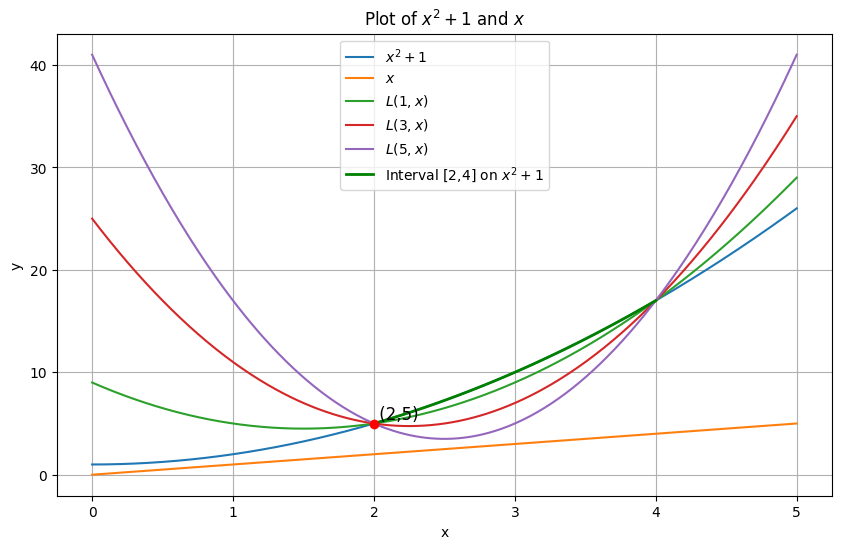

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 5, 400)

# Define the functions
y1 = x**2 + 1
y2 = x
L_1 = x**2 + 1 + (x-2)*(x-4)
L_3 = x**2 + 1 + 3*(x-2)*(x-4)
L_5 = x**2 + 1 + 5*(x-2)*(x-4)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='$x^2 + 1$')
plt.plot(x, y2, label='$x$')
plt.plot(x, L_1, label='$L(1,x)$')
plt.plot(x, L_3, label='$L(3,x)$')
plt.plot(x, L_5, label='$L(5,x)$')

# Highlight the point (2,5)
plt.scatter([2], [5], color='red', zorder=5)
plt.text(2, 5, ' (2,5)', fontsize=12, verticalalignment='bottom')

# Highlight the interval [2,4] on the function x^2 + 1
x_interval = np.linspace(2, 4, 100)
y_interval = x_interval**2 + 1
plt.plot(x_interval, y_interval, color='green', linewidth=2, label='Interval [2,4] on $x^2 + 1$')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $x^2 + 1$ and $x$')
plt.legend()
plt.grid(True)
plt.savefig('5_1_part_b_1')
plt.show()

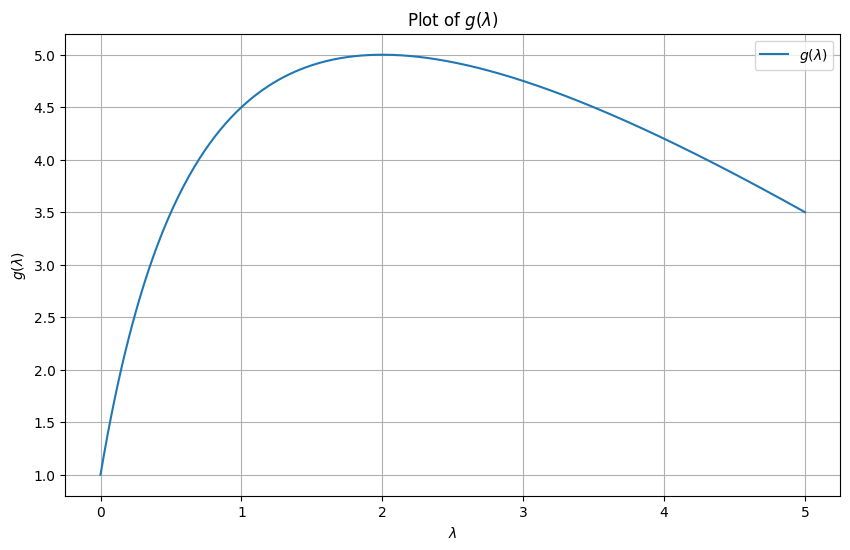

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range for lambda
lambda_range = np.linspace(0, 5, 400)

# Define the function g(lambda)
g_lambda = (3 * lambda_range / (1 + lambda_range))**2 + 1 + lambda_range * ((3 * lambda_range / (1 + lambda_range)) - 2) * ((3 * lambda_range / (1 + lambda_range)) - 4)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_range, g_lambda, label='$g(\\lambda)$')

# Add labels and legend
plt.xlabel('$\\lambda$')
plt.ylabel('$g(\\lambda)$')
plt.title('Plot of $g(\\lambda)$')
plt.legend()
plt.grid(True)
plt.savefig('5_1_part_b_2')
plt.show()

## Additional Problem 5

Solving the 4.16 exercise problem with cvx py


In [16]:
import cvxpy as cp
import numpy as np

m = 3
n = 3

A = np.array([
    [-1.0, 0.4, 0.8],
	[ 1.0, 0.0, 0.0],
	[ 0.0, 1.0, 0.0]
	])
b = np.array([1,0,0.3])
x_des = np.array([7,2,-6])
N = 30

x = cp.Variable((m,N+1))
z = cp.Variable(m)
y = cp.Variable(m)
u = cp.Variable((m,N))

x_0 = np.zeros(m)

cost = np.ones(m).T @ z
constr = []

for t in range(N):
	constr += [x[:,t+1] == A @ x[:,t] + b @ u[:,t]] #The signal change constraints
	constr += [-y <= u[:,t], u[:,t] <= y] #absolute value u constraint

constr += [x[:,N] == x_des] # End in desired state constraint
constr += [x[:,0] == x_0]
constr += [z >= y]
constr += [z >= 2 * y -1]


problem = cp.Problem(cp.Minimize(cost),constr)

problem.solve()


1.7413778897667582

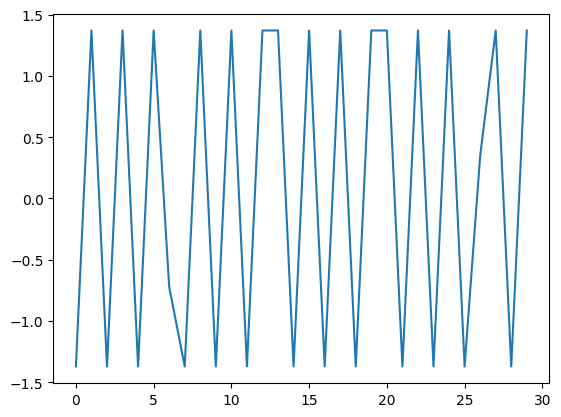

In [36]:
import matplotlib.pyplot as plt
plt.plot(u[0,:].value)